<a href="https://colab.research.google.com/github/plaban1981/Handle-Imbalanced-Datasets-Techniques/blob/master/Anamoly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Anomaly Detection with Isolation Forest & Visualization

## Reference Links

https://towardsdatascience.com/anomaly-detection-with-isolation-forest-visualization-23cd75c281e2

https://medium.com/@hyunsukim_9320/isolation-forest-step-by-step-341b82923168

https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e

A sudden spike or dip in a metric is an anomalous behavior and both the cases needs attention. 


Detection of anomaly can be solved by supervised learning algorithms if we have information on anomalous behavior before modeling, but initially without feedback its difficult to identify that points. 

So we model this as an unsupervised problem using algorithms like Isolation Forest,One class SVM and LSTM.

Here we are using Isolation Forest as the Machine Learning Model to detect Anomaly.

**The main intution behind  Isolation Forest is - Since anomalies are few and different’ and therefore they are more susceptible to isolation**

## Isolation Forest

The idea behind Isolation Forest is that anomalies are easier to separate from the rest of the data than other points. 


* The Isolation Forest algorithm partitions the data through a forest of decision trees. 

* Each split is made randomly. 

* The number of splits it takes to isolate a record indicates whether or not the record is an anomaly. 

* When a forest of random trees collectively produces shorter path lengths for particular samples, they are highly likely to be anomalies.

## SAMPLE DATA: HR Employee Attrition and Performance

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.


## Intution :

To find out anomalies in the sample dataset containing employee with information about their employment history and whether they engaged in attrition.

## Data Definitions:

Education	
  1 'Below College'
	2 'College'
	3 'Bachelor'
	4 'Master'
	5 'Doctor'
	
EnvironmentSatisfaction	
  1 'Low'
	2 'Medium'
	3 'High'
	4 'Very High'
	
JobInvolvement	
  1 'Low'
	2 'Medium'
	3 'High'
	4 'Very High'
	
JobSatisfaction	
    1 'Low'
	2 'Medium'
	3 'High'
	4 'Very High'
	
PerformanceRating	
  1 'Low'
	2 'Good'
	3 'Excellent'
	4 'Outstanding'
	
RelationshipSatisfaction	
  1 'Low'
	2 'Medium'
	3 'High'
	4 'Very High'
	
WorkLifeBalance	
  1 'Bad'
	2 'Good'
	3 'Better'
	4 'Best'



In [2]:
from google.colab import files
files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.xlsx to WA_Fn-UseC_-HR-Employee-Attrition.xlsx


{'WA_Fn-UseC_-HR-Employee-Attrition.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\x12\x18\xde\xddd\x01\x00\x00\x18\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

## Import Libraries

In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('WA_Fn-UseC_-HR-Employee-Attrition.xlsx')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Shape of the Dataframe

In [5]:
df.shape

(1470, 35)

## To find our anomalous employees, let's train our isolation forest and see how the predictions look. We will only use a subset of columns for demo purposes.

In [6]:
col = ['Age', 'BusinessTravel', 'DistanceFromHome', 'Education', 'Gender', 'JobInvolvement', 'JobLevel', 
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
df[col].head()

,Age,BusinessTravel,DistanceFromHome,Education,Gender,JobInvolvement,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1,2,Female,3,2,Single,5993,8,Yes,11,3,8,0,6,4,0,5
1,49,Travel_Frequently,8,1,Male,2,2,Married,5130,1,No,23,4,10,3,10,7,1,7
2,37,Travel_Rarely,2,2,Male,2,1,Single,2090,6,Yes,15,3,7,3,0,0,0,0
3,33,Travel_Frequently,3,4,Female,3,1,Married,2909,1,Yes,11,3,8,3,8,7,3,0
4,27,Travel_Rarely,2,1,Male,3,1,Married,3468,9,No,12,3,6,3,2,2,2,2


In [0]:
df_sample = df[col]


In [0]:
string_cols = []
for i in df_sample.columns:
  if df_sample[i].dtype == 'object':
    string_cols.append(i)

In [9]:
string_cols

['BusinessTravel', 'Gender', 'MaritalStatus', 'OverTime']

## Perform Label Encoding

In [0]:
lb = LabelEncoder()
for i in string_cols:
  df_sample[i] = lb.fit_transform(df_sample[i])

In [11]:
df_sample.head()

,Age,BusinessTravel,DistanceFromHome,Education,Gender,JobInvolvement,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1,2,0,3,2,2,5993,8,1,11,3,8,0,6,4,0,5
1,49,1,8,1,1,2,2,1,5130,1,0,23,4,10,3,10,7,1,7
2,37,2,2,2,1,2,1,2,2090,6,1,15,3,7,3,0,0,0,0
3,33,1,3,4,0,3,1,1,2909,1,1,11,3,8,3,8,7,3,0
4,27,2,2,1,1,3,1,1,3468,9,0,12,3,6,3,2,2,2,2


In [12]:
df_sample.isnull().sum()

Age                        0
BusinessTravel             0
DistanceFromHome           0
Education                  0
Gender                     0
JobInvolvement             0
JobLevel                   0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [13]:
print(df[col].shape)
print(df_sample.shape)

(1470, 19)
(1470, 19)


In [0]:
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12),max_features=1.0, bootstrap=True, random_state=42, verbose=0)

## train the isolation forest model on the training data

In [15]:
clf.fit(df_sample)

IsolationForest(behaviour='old', bootstrap=True, contamination=0.12,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

## predict anomalies after the model has been trained

In [16]:
pred = clf.predict(df_sample)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


## perform Label Decoding

In [17]:
df_anomaly_pred = df[col]
df_anomaly_pred['Anomaly'] = pred
df_anomaly_pred.head()

,Age,BusinessTravel,DistanceFromHome,Education,Gender,JobInvolvement,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Anomaly
0,41,Travel_Rarely,1,2,Female,3,2,Single,5993,8,Yes,11,3,8,0,6,4,0,5,1
1,49,Travel_Frequently,8,1,Male,2,2,Married,5130,1,No,23,4,10,3,10,7,1,7,1
2,37,Travel_Rarely,2,2,Male,2,1,Single,2090,6,Yes,15,3,7,3,0,0,0,0,1
3,33,Travel_Frequently,3,4,Female,3,1,Married,2909,1,Yes,11,3,8,3,8,7,3,0,1
4,27,Travel_Rarely,2,1,Male,3,1,Married,3468,9,No,12,3,6,3,2,2,2,2,1


## Find the number of anomalies - points classified -1 are anomalous





In [18]:
df_anomaly_pred['Anomaly'].unique()

array([ 1, -1])

In [19]:
df_anomaly_pred['Anomaly'].value_counts()

 1    1293
-1     177
Name: Anomaly, dtype: int64

In [20]:
df_anomaly_pred[df_anomaly_pred['Anomaly'] == -1]['Anomaly'].count()

177

In [21]:
df_anomaly_pred[df_anomaly_pred['Anomaly'] ==-1].head()

,Age,BusinessTravel,DistanceFromHome,Education,Gender,JobInvolvement,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Anomaly
6,59,Travel_Rarely,3,3,Female,4,1,Married,2670,4,Yes,20,4,12,3,1,0,0,0,-1
26,32,Travel_Frequently,16,1,Female,1,1,Single,3919,1,Yes,22,4,10,5,10,2,6,7,-1
45,41,Travel_Rarely,12,3,Female,3,5,Married,19545,1,No,12,3,23,0,22,15,15,8,-1
46,34,Non-Travel,23,4,Male,3,2,Single,4568,0,No,20,4,10,2,9,5,8,7,-1
52,44,Travel_Rarely,1,5,Female,3,2,Divorced,5454,5,Yes,21,4,9,2,4,3,1,3,-1


In [0]:
Labels = ['Fraud','Normal']

## Visualization of Anomaly and Normal Data

Text(0.5, 0, '1 : Normal        -1 : Fraud')

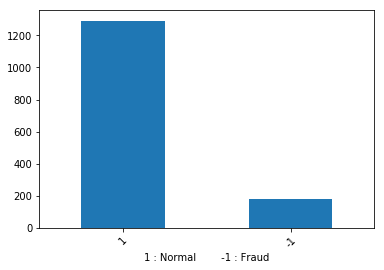

In [24]:
df_anomaly_pred['Anomaly'].value_counts().plot.bar(rot= 45,label=('Fraud','Normal'))
plt.xlabel('1 : Normal        -1 : Fraud')

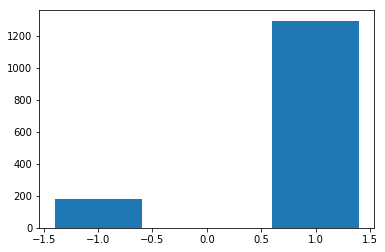

In [26]:

counts = df_anomaly_pred['Anomaly'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

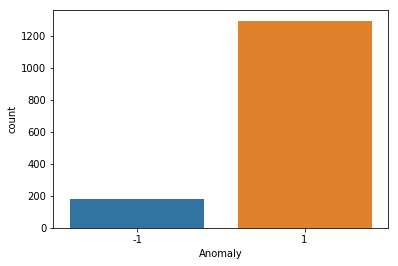

In [27]:
import seaborn as sns
sns.countplot(x='Anomaly',data=df_anomaly_pred)

## Normalize and fit the prredictors to a PCA to reduce the number of dimensions and then plot them in 3D highlighting the anomalies.

In [28]:
df_anomaly_pred.head()

,Age,BusinessTravel,DistanceFromHome,Education,Gender,JobInvolvement,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Anomaly
0,41,Travel_Rarely,1,2,Female,3,2,Single,5993,8,Yes,11,3,8,0,6,4,0,5,1
1,49,Travel_Frequently,8,1,Male,2,2,Married,5130,1,No,23,4,10,3,10,7,1,7,1
2,37,Travel_Rarely,2,2,Male,2,1,Single,2090,6,Yes,15,3,7,3,0,0,0,0,1
3,33,Travel_Frequently,3,4,Female,3,1,Married,2909,1,Yes,11,3,8,3,8,7,3,0,1
4,27,Travel_Rarely,2,1,Male,3,1,Married,3468,9,No,12,3,6,3,2,2,2,2,1


In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [0]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(df_sample)
X_reduce = pca.fit_transform(X)

In [31]:
X.shape

(1470, 19)

In [32]:
X_reduce.shape

(1470, 3)

In [0]:
outliers=df_sample.loc[df_anomaly_pred['Anomaly']==-1]
outlier_index=list(outliers.index)

In [35]:
outliers.head()

,Age,BusinessTravel,DistanceFromHome,Education,Gender,JobInvolvement,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
6,59,2,3,3,0,4,1,1,2670,4,1,20,4,12,3,1,0,0,0
26,32,1,16,1,0,1,1,2,3919,1,1,22,4,10,5,10,2,6,7
45,41,2,12,3,0,3,5,1,19545,1,0,12,3,23,0,22,15,15,8
46,34,0,23,4,1,3,2,2,4568,0,0,20,4,10,2,9,5,8,7
52,44,2,1,5,0,3,2,0,5454,5,1,21,4,9,2,4,3,1,3


In [37]:
outlier_index[:5]

[6, 26, 45, 46, 52]

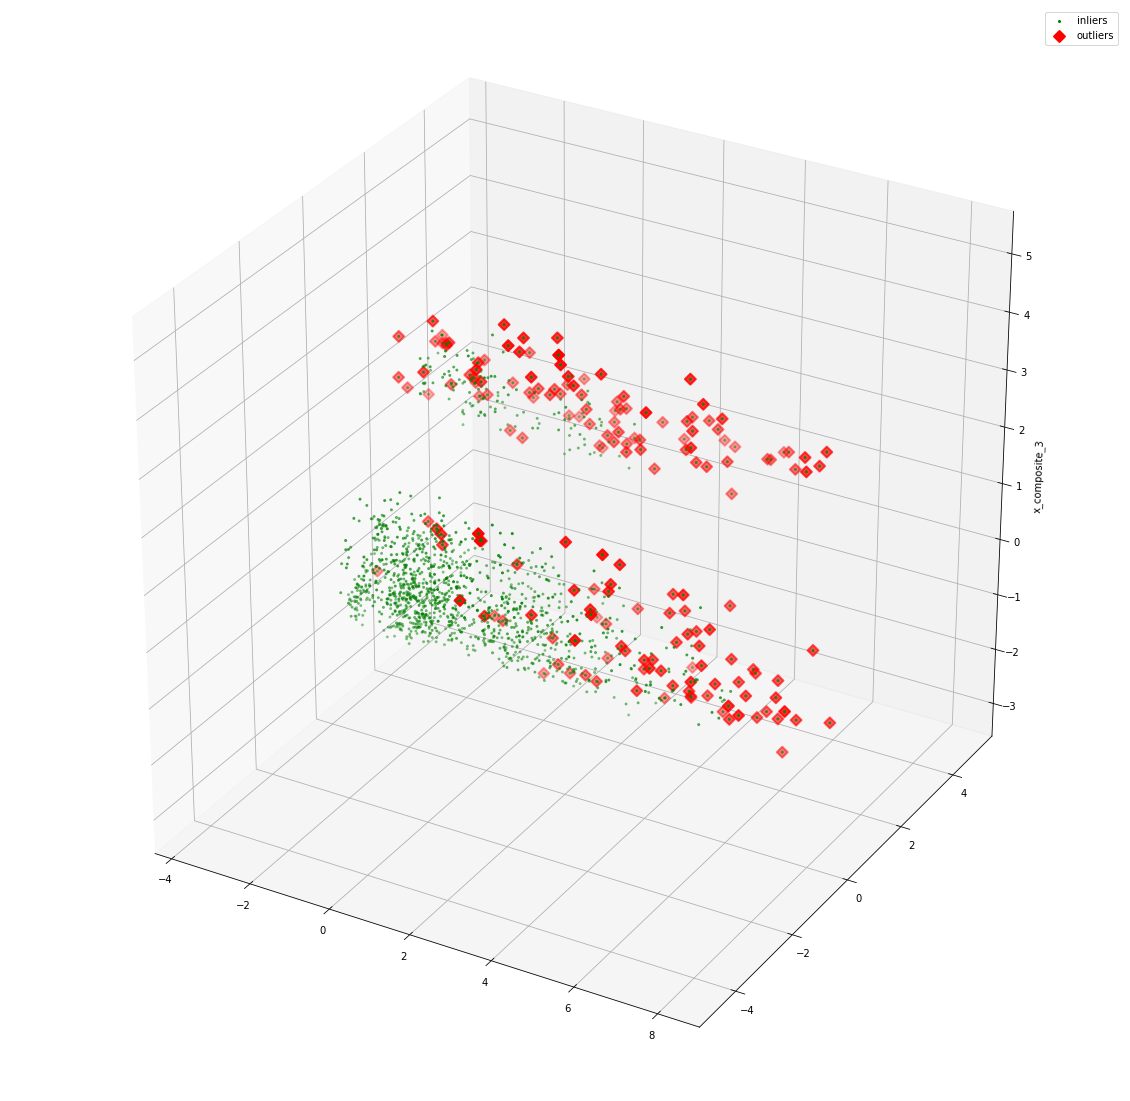

In [40]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="D", c="red", label="outliers")
ax.legend()
plt.show()

In [41]:
print(df_anomaly_pred['Anomaly'].value_counts())

 1    1293
-1     177
Name: Anomaly, dtype: int64


Now as we see the 3D point the anomaly points are mostly wide from the cluster of normal points,but a 2D point will help us to even judge better.
Lets try plotting the same fed to a PCA reduced to 2 dimensions.

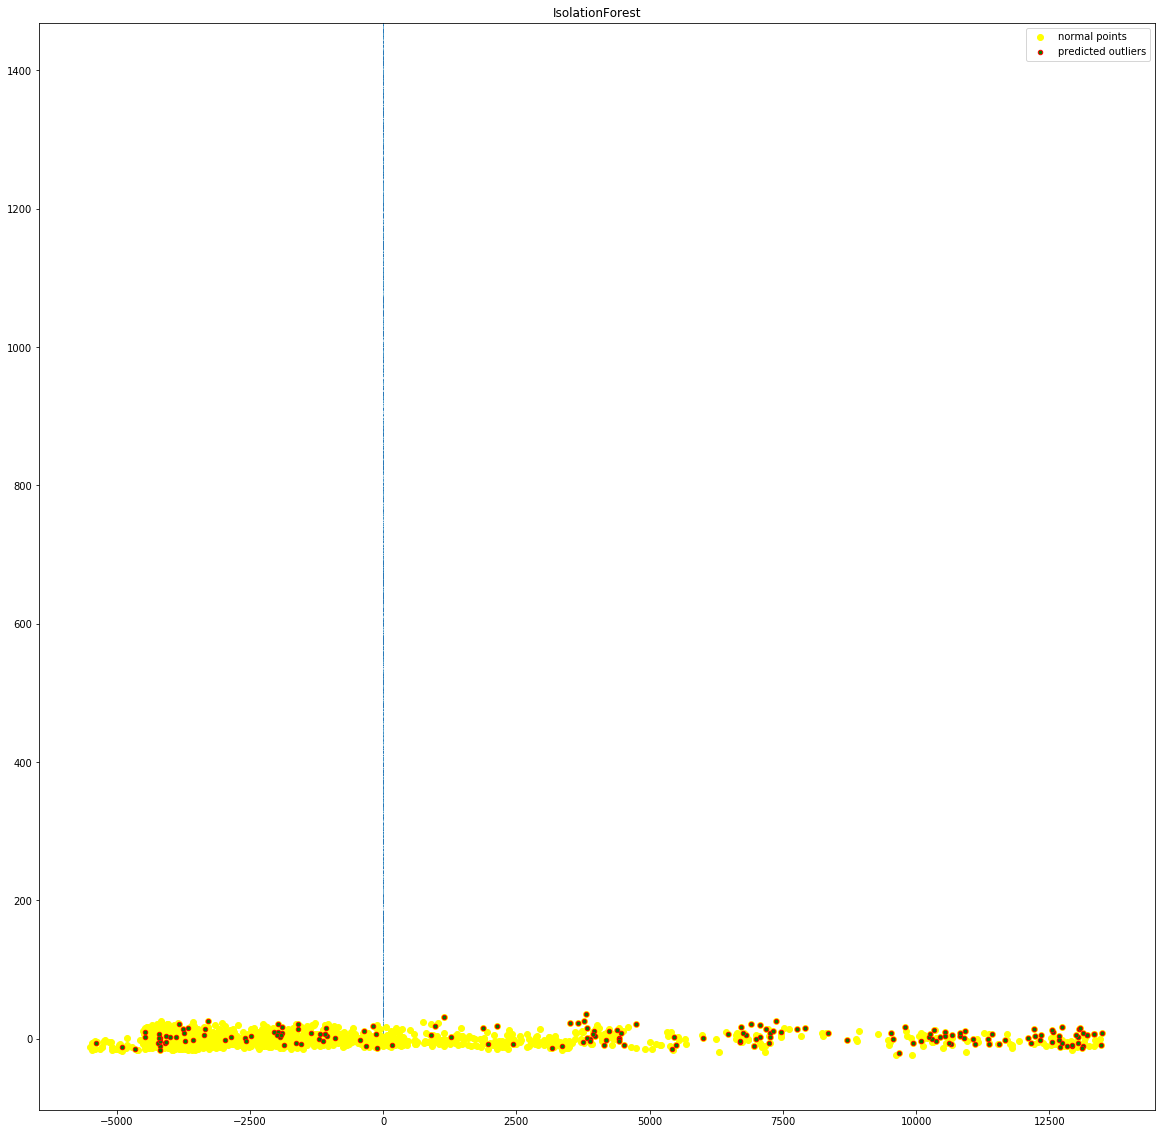

In [51]:
pca = PCA(2)
pca.fit(df_sample)
res=pd.DataFrame(pca.transform(df_sample))
Z = np.array(res)
#
plt.figure(figsize=(20,20))
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
#b1 = plt.scatter(res[0], res[1], c='yellow',s=20,label="normal points")
plt.scatter(res[0], res[1], c='yellow',label="normal points")
#b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

## Anomalies are highlighted as red edges and normal points are indicated with yellow points in the plot.

In [55]:
df_anomaly_pred.head()

,Age,BusinessTravel,DistanceFromHome,Education,Gender,JobInvolvement,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Anomaly
0,41,Travel_Rarely,1,2,Female,3,2,Single,5993,8,Yes,11,3,8,0,6,4,0,5,1
1,49,Travel_Frequently,8,1,Male,2,2,Married,5130,1,No,23,4,10,3,10,7,1,7,1
2,37,Travel_Rarely,2,2,Male,2,1,Single,2090,6,Yes,15,3,7,3,0,0,0,0,1
3,33,Travel_Frequently,3,4,Female,3,1,Married,2909,1,Yes,11,3,8,3,8,7,3,0,1
4,27,Travel_Rarely,2,1,Male,3,1,Married,3468,9,No,12,3,6,3,2,2,2,2,1


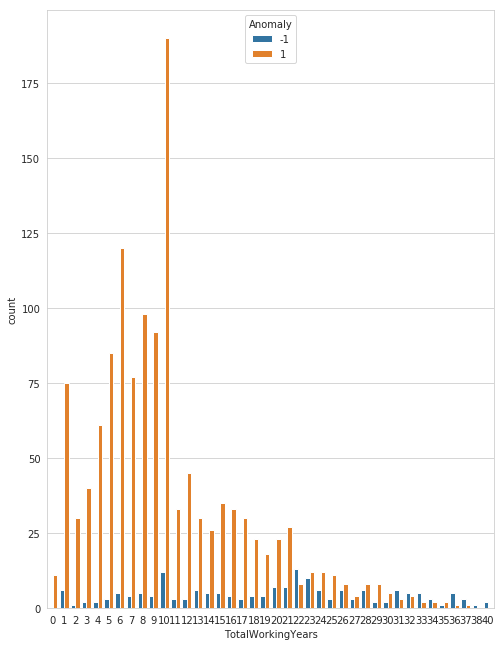

In [58]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,11))
sns.countplot(x='TotalWorkingYears',data=df_anomaly_pred,hue='Anomaly')

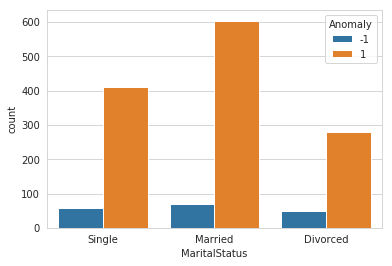

In [59]:
sns.countplot(x='MaritalStatus',data=df_anomaly_pred,hue='Anomaly')

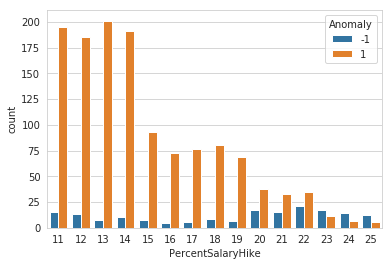

In [60]:
sns.countplot(x='PercentSalaryHike',data=df_anomaly_pred,hue='Anomaly')